<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li><li><span><a href="#Some-notes" data-toc-modified-id="Some-notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some notes</a></span><ul class="toc-item"><li><span><a href="#Cost-functions" data-toc-modified-id="Cost-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cost functions</a></span></li></ul></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Viz-costs" data-toc-modified-id="Viz-costs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Viz costs</a></span></li><li><span><a href="#Sampling-solutions" data-toc-modified-id="Sampling-solutions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sampling solutions</a></span></li></ul></li><li><span><a href="#Building-the-&quot;grid&quot;" data-toc-modified-id="Building-the-&quot;grid&quot;-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building the "grid"</a></span></li></ul></div>

In [1]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size = 12)
rc('xtick', labelsize = 12)
rc('ytick', labelsize = 12)
rc('figure', figsize = (8, 4))

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from amod_ed.contractivity_v3 import viz_costs, _construct_problem
from amod_ed.contractivity_v3 import sample_solutions, run_algorithm
import cvxpy as cp
import networkx as nx

import pandas as pd

from amod_ed.contractivity_v3 import plot_results_run, compute_error_KKT, get_d_values

from amod_ed.contractivity_v3 import get_new_r, get_edge_flow, get_flow_edge_od

# Description

# Load

The characteristics of the graph are loaded from Excel files. 

In [3]:
edges = pd.read_excel('cost_edges_4.xlsx')
inv_edges = pd.read_excel('inv_demand_4.xlsx')

In [12]:
edges['phi']=np.random.randint(2, 5, 12)

In [15]:
edges['k']=np.random.randint(1, 5, 12)

In [16]:
edges

,origin,destination,phi,k
0,1,2,2,1
1,2,1,4,3
2,1,3,3,2
3,3,1,2,2
4,2,3,3,4
5,3,2,2,4
6,1,4,4,1
7,2,4,2,2
8,3,4,4,4
9,4,1,2,2


In [7]:
inv_edges['k'] = .5

In [8]:
inv_edges['shift'] = 15

In [9]:
inv_edges['phi']+=1

In [10]:
inv_edges

,origin,destination,phi,k,shift
0,1,2,2,0.5,15
1,2,1,4,0.5,15
2,3,1,3,0.5,15
3,1,3,5,0.5,15
4,2,3,2,0.5,15
5,3,2,4,0.5,15
6,1,4,2,0.5,15
7,2,4,4,0.5,15
8,3,4,3,0.5,15
9,4,1,5,0.5,15


## Viz costs

Visualize the costs for each OD pair specified in the Excels. 

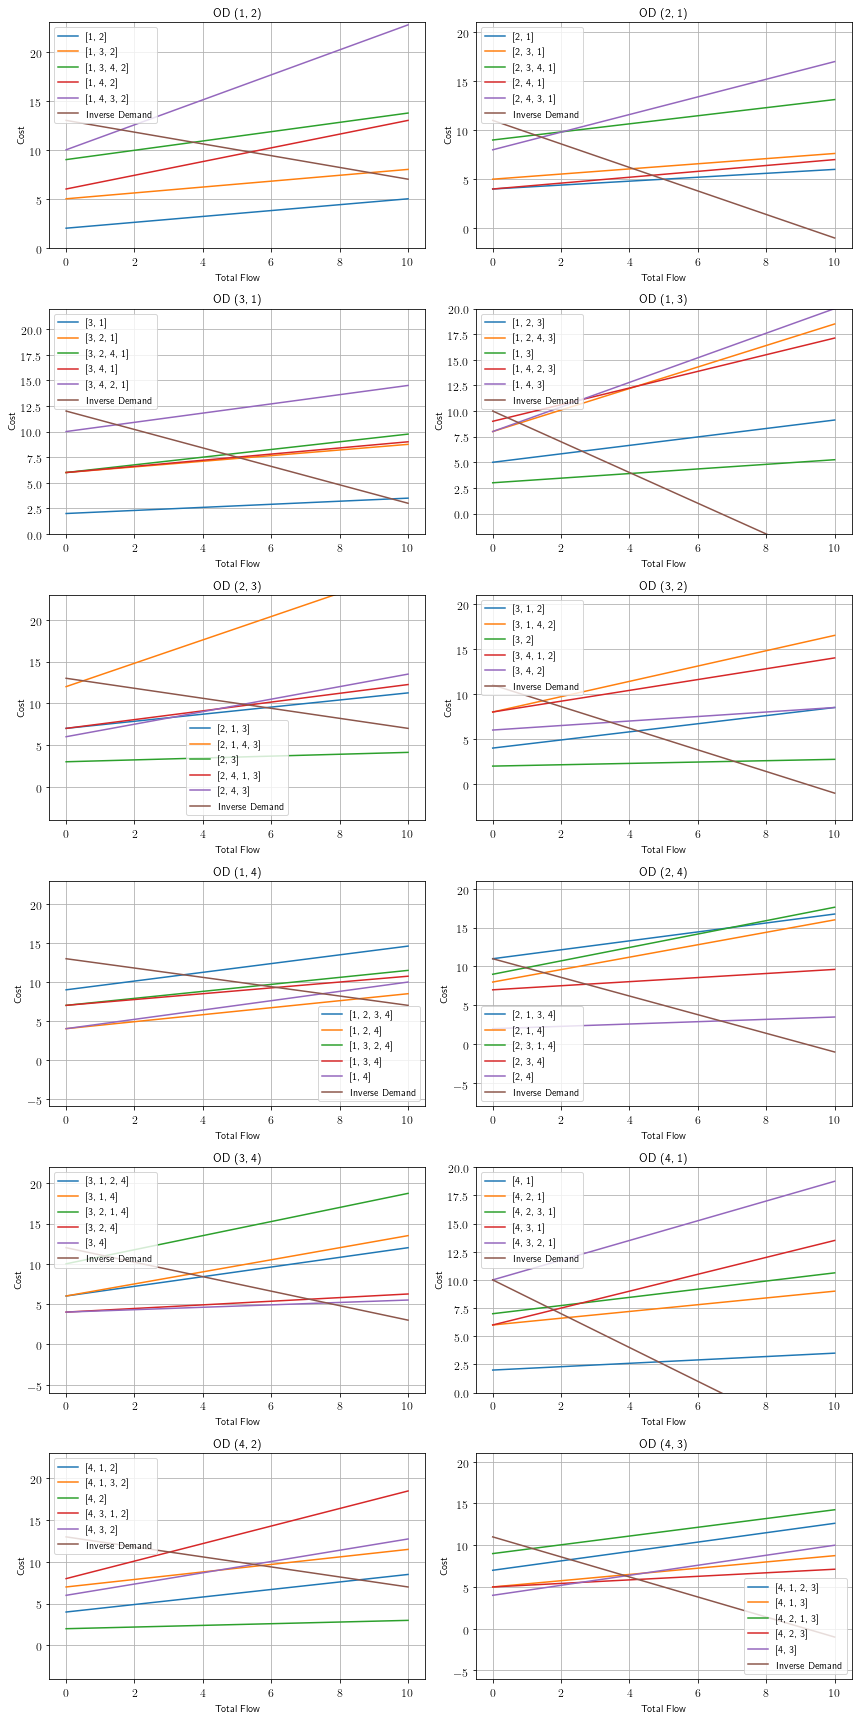

In [17]:
viz_costs(edges, inv_edges, name = 'costs1', save = False, correct = False, beta = 1)

## Sampling solutions

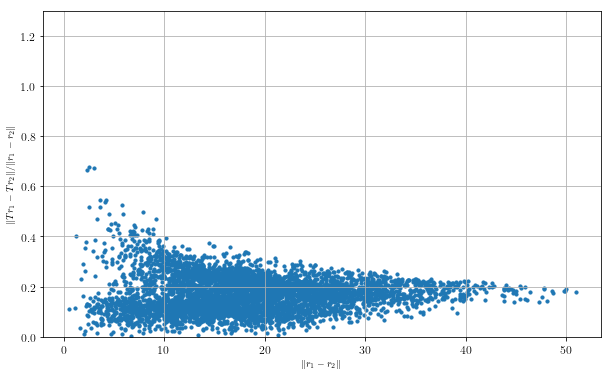

In [21]:
Tr, r_, dT, dr = sample_solutions(edges, inv_edges, \
                                  solver = 'GUROBI', nsamples = 5000, seed=0, \
                                  correct = False, beta = 1)